In [290]:
!pip install imblearn

     |████████████████████████████████| 189 kB 8.4 MB/s eta 0:00:01


In [341]:
import pandas as pd
import glob
import os
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
import collections
from sklearn.metrics import roc_auc_score as AUC

In [343]:
df = pd.read_csv("./wine.csv")

In [270]:
df.head(20)

,country,is_blend,is_dry,is_red,is_rose,is_sparkling,is_sweet,is_white,price,province,region_1,taster_name,variety,year,rating
0,Italy,0,0,0,0,0,0,0,30.0,Northeastern Italy,Alto Adige,Kerin O’Keefe,Sauvignon,2012.0,3
1,France,0,0,1,0,0,0,0,22.0,Loire Valley,Sancerre,Roger Voss,Rosé,2014.0,2
2,Italy,0,0,1,0,0,0,0,25.0,Tuscany,Chianti Classico,Roger Voss,Sangiovese,2009.0,1
3,US,0,0,1,1,0,0,0,50.0,California,Russian River Valley,Virginie Boone,Pinot Noir,2012.0,3
4,US,0,0,0,0,0,0,0,38.0,California,Russian River Valley,Virginie Boone,Chardonnay,2013.0,3
5,US,0,0,0,0,0,0,0,14.0,California,Dry Creek Valley,Roger Voss,Chardonnay,2012.0,1
6,US,0,1,0,0,0,0,0,25.0,New York,North Fork of Long Island,Anna Lee C. Iijima,Gewürztraminer,2013.0,2
7,US,0,1,0,0,0,0,0,35.0,California,Paso Robles,Roger Voss,Barbera,2007.0,1
8,France,1,0,0,0,0,0,0,25.0,Bordeaux,Sauternes,Roger Voss,Bordeaux-style White Blend,2009.0,4
9,France,1,0,0,0,0,0,1,12.0,Bordeaux,Bordeaux Blanc,Roger Voss,Bordeaux-style White Blend,2014.0,2


In [271]:
df.head(20)

,country,is_blend,is_dry,is_red,is_rose,is_sparkling,is_sweet,is_white,price,province,region_1,taster_name,variety,year,rating
0,Italy,0,0,0,0,0,0,0,30.0,Northeastern Italy,Alto Adige,Kerin O’Keefe,Sauvignon,2012.0,3
1,France,0,0,1,0,0,0,0,22.0,Loire Valley,Sancerre,Roger Voss,Rosé,2014.0,2
2,Italy,0,0,1,0,0,0,0,25.0,Tuscany,Chianti Classico,Roger Voss,Sangiovese,2009.0,1
3,US,0,0,1,1,0,0,0,50.0,California,Russian River Valley,Virginie Boone,Pinot Noir,2012.0,3
4,US,0,0,0,0,0,0,0,38.0,California,Russian River Valley,Virginie Boone,Chardonnay,2013.0,3
5,US,0,0,0,0,0,0,0,14.0,California,Dry Creek Valley,Roger Voss,Chardonnay,2012.0,1
6,US,0,1,0,0,0,0,0,25.0,New York,North Fork of Long Island,Anna Lee C. Iijima,Gewürztraminer,2013.0,2
7,US,0,1,0,0,0,0,0,35.0,California,Paso Robles,Roger Voss,Barbera,2007.0,1
8,France,1,0,0,0,0,0,0,25.0,Bordeaux,Sauternes,Roger Voss,Bordeaux-style White Blend,2009.0,4
9,France,1,0,0,0,0,0,1,12.0,Bordeaux,Bordeaux Blanc,Roger Voss,Bordeaux-style White Blend,2014.0,2


# One-hot

In [344]:
df_used=pd.get_dummies(df) 

In [273]:
df_used.head()

,is_blend,is_dry,is_red,is_rose,is_sparkling,is_sweet,is_white,price,year,rating,...,variety_Vitovska,variety_Viura,variety_Viura-Chardonnay,variety_Weissburgunder,variety_Welschriesling,variety_White Blend,variety_Xarel-lo,variety_Xinomavro,variety_Zinfandel,variety_Zweigelt
0,0,0,0,0,0,0,0,30.0,2012.0,3,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,22.0,2014.0,2,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,25.0,2009.0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,50.0,2012.0,3,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,38.0,2013.0,3,...,0,0,0,0,0,0,0,0,0,0


In [345]:
df_x=df_used.drop(columns=['rating'])
df_y=df_used[['rating']]

In [306]:
df_x.head()

,is_blend,is_dry,is_red,is_rose,is_sparkling,is_sweet,is_white,price,year,country_Argentina,...,variety_Vitovska,variety_Viura,variety_Viura-Chardonnay,variety_Weissburgunder,variety_Welschriesling,variety_White Blend,variety_Xarel-lo,variety_Xinomavro,variety_Zinfandel,variety_Zweigelt
0,0,0,0,0,0,0,0,30.0,2012.0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,22.0,2014.0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,25.0,2009.0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,50.0,2012.0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,38.0,2013.0,0,...,0,0,0,0,0,0,0,0,0,0


In [276]:
df_y.head(20)

,rating
0,3
1,2
2,1
3,3
4,3
5,1
6,2
7,1
8,4
9,2


In [346]:
X_train, X_test, y_train, y_test=train_test_split(df_x, df_y, test_size=0.2,random_state=123)

In [337]:
# imbalance problem

smo = SMOTE(random_state=42)
X_train, y_train = smo.fit_resample(X_train, y_train)

In [340]:
X_train.shape

(28110, 1369)

# StandardScaler

In [347]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [285]:
# Grid Search
from sklearn.model_selection import GridSearchCV  
svc_model = svm.SVC(kernel='rbf')
param_grid = {'C': [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000], 'gamma': [0.001, 0.0001]}  
grid_search = GridSearchCV(svc_model, param_grid, n_jobs=8, verbose=1)  

grid_search.fit(X_train, y_train.values.ravel())  

best_parameters = grid_search.best_estimator_.get_params()  

#  results of different parameters
print("cv results are" % grid_search.best_params_, grid_search.cv_results_)  

# the best parameters combination
print("best parameters are" % grid_search.best_params_, grid_search.best_params_) 
print("best score are" % grid_search.best_params_, grid_search.best_score_)  

# the beat model
svm_model = svm.SVC(kernel='rbf', C=best_parameters['C'], gamma=best_parameters['gamma'])  

Fitting 5 folds for each of 14 candidates, totalling 70 fits


/Users/jiangruobing/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


cv results are {'mean_fit_time': array([471.76167784, 472.6899621 , 494.83407764, 488.33451538,
       497.25180988, 479.98127184, 425.74792562, 452.25283761,
       381.39476056, 386.74763966, 353.10073714, 357.60442371,
       329.21291242, 277.31597705]), 'std_fit_time': array([ 2.32992092,  2.51103995,  3.20822324,  3.15806175,  7.66633351,
        0.73970461,  2.60167507,  2.43120053,  2.02967872,  1.17862485,
        1.53540694,  2.65057693, 27.13735904,  2.32282901]), 'mean_score_time': array([67.6430428 , 69.59464388, 72.22249537, 69.02122998, 67.41598973,
       67.93223352, 66.90013351, 70.24768982, 64.88778687, 65.19723721,
       61.62539883, 64.35010114, 56.08639741, 38.59926395]), 'std_score_time': array([0.2263078 , 1.89664994, 0.40923278, 1.71467796, 0.49446184,
       1.02308037, 2.48076743, 1.00103932, 0.38804634, 0.99305133,
       0.97514023, 1.52495829, 4.96966816, 2.28003517]), 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
  

In [348]:
svm_model.fit(X_train, y_train)
y_pred_class = svm_model.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

/Users/jiangruobing/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.6876884422110553

ACC: 0.6876884422110553
Confusion Matrix:
 [[ 35  26  17   2   0]
 [  9 690 209  84   0]
 [ 12 186 935 254   9]
 [  0  82 227 995  30]
 [  0   8  16  72  82]]
Overall Report:
               precision    recall  f1-score   support

           0       0.62      0.44      0.51        80
           1       0.70      0.70      0.70       992
           2       0.67      0.67      0.67      1396
           3       0.71      0.75      0.73      1334
           4       0.68      0.46      0.55       178

    accuracy                           0.69      3980
   macro avg       0.67      0.60      0.63      3980
weighted avg       0.69      0.69      0.69      3980



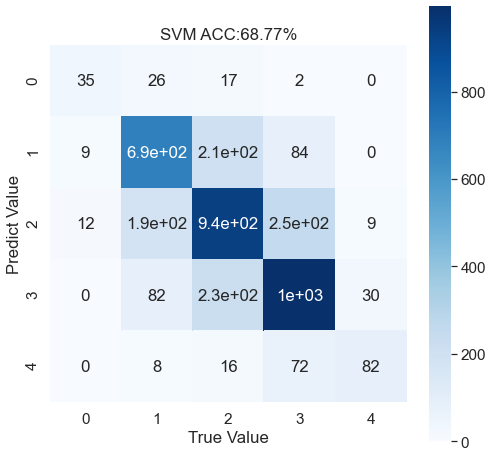

In [349]:
acc = metrics.accuracy_score(y_test, y_pred_class)
print('ACC:', acc)
mat = confusion_matrix(y_test, y_pred_class)
print('Confusion Matrix:\n', mat)

plt.figure(figsize=(8, 8))
sns.set(font_scale=1.4)
sns.heatmap(mat, square=True, annot=True, cmap='Blues')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.title('SVM ACC:{0:.2f}%'.format(acc * 100))

print('Overall Report:\n', classification_report(y_test, y_pred_class))